<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import json
import tensorflow as tf
import pandas as pd
 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_data = pd.read_csv('train_data.csv')
train_data = list(train_data['Post'])
train_labels = pd.read_csv('train_data.csv')
train_labels = list(train_labels['Labels Set'])
 
 
valid_data = pd.read_csv('validation_data.csv')
valid_labels = valid_data['Labels Set']
valid_data = valid_data['Post']
 
print(train_labels)

['hate,offensive', 'non-hostile', 'non-hostile', 'defamation,offensive', 'non-hostile', 'fake', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'hate', 'offensive', 'non-hostile', 'non-hostile', 'offensive', 'fake', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'fake', 'fake,hate', 'offensive', 'non-hostile', 'non-hostile', 'hate,offensive', 'fake', 'hate', 'defamation', 'non-hostile', 'fake', 'non-hostile', 'non-hostile', 'non-hostile', 'hate', 'defamation', 'hate', 'non-hostile', 'offensive', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'defamation,hate', 'defamation', 'non-hostile', 'non-hostile', 'non-hostile', 'fake', 'non-hostile', 'non-hostile', 'fake', 'non-hostile', 'defamation,offensive', 'non-hostile', 'non-hostile', 'non-hostile', 'defamation', 'offensive', 'offensive', 'offensive', 'non-hostile', 'non-hostile', 'non-hostile', 'fake', 'non-hostile', 'fake', 'defamation', 'non-hostile', 'non-hostile', 'fake', 'fake', 'fake', 'hate', '

In [ ]:
# with open("/tmp/sarcasm.json", 'r') as f:
#     datastore = json.load(f)
 
# sentences = []
# labels = []
 
# for item in datastore:
#     sentences.append(item['headline'])
#     labels.append(item['is_sarcastic'])
sentences = train_data
labels = train_labels

In [ ]:
training_size = 1000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
vocab_size = 10000
embedding_dim = 100
max_length = 500
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
 
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
 
 
token2 = Tokenizer()
token2.fit_on_texts(training_labels)
 
training_labels = token2.texts_to_sequences(training_labels)
testing_labels = token2.texts_to_sequences(testing_labels)
training_labels = pad_sequences(training_labels,2,padding='pre')
testing_labels = pad_sequences(testing_labels,2,padding='pre')
token2.word_index

{'defamation': 6, 'fake': 3, 'hate': 4, 'hostile': 2, 'non': 1, 'offensive': 5}

In [ ]:
temp = tf.one_hot(training_labels,6)
training_labels = tf.convert_to_tensor([x+y for x,y in temp])
temp2 = tf.one_hot(testing_labels,6)
testing_labels = tf.convert_to_tensor([x+y for x,y in temp2])

In [ ]:
testing_labels.shape

TensorShape([4728, 6])

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
 
training_size = 10
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded,testing_labels), verbose=2)
history

Epoch 1/100
32/32 - 1s - loss: 3.4145 - accuracy: 0.5060 - val_loss: 3.3726 - val_accuracy: 0.5305
Epoch 2/100
32/32 - 1s - loss: 3.3435 - accuracy: 0.5420 - val_loss: 3.3018 - val_accuracy: 0.5305
Epoch 3/100
32/32 - 1s - loss: 3.2893 - accuracy: 0.5420 - val_loss: 3.2761 - val_accuracy: 0.5305
Epoch 4/100
32/32 - 1s - loss: 3.2733 - accuracy: 0.2420 - val_loss: 3.2704 - val_accuracy: 0.0000e+00
Epoch 5/100
32/32 - 1s - loss: 3.2720 - accuracy: 0.3200 - val_loss: 3.2703 - val_accuracy: 0.0000e+00
Epoch 6/100
32/32 - 1s - loss: 3.2716 - accuracy: 0.4630 - val_loss: 3.2703 - val_accuracy: 0.5157
Epoch 7/100
32/32 - 1s - loss: 3.2717 - accuracy: 0.4340 - val_loss: 3.2703 - val_accuracy: 0.5110
Epoch 8/100
32/32 - 1s - loss: 3.2717 - accuracy: 0.4410 - val_loss: 3.2704 - val_accuracy: 0.3335
Epoch 9/100
32/32 - 1s - loss: 3.2717 - accuracy: 0.4460 - val_loss: 3.2704 - val_accuracy: 0.5218
Epoch 10/100
32/32 - 1s - loss: 3.2717 - accuracy: 0.4830 - val_loss: 3.2704 - val_accuracy: 0.2229
E

In [ ]:
history.history

{'accuracy': [0.5059999823570251,
  0.5419999957084656,
  0.5419999957084656,
  0.24199999868869781,
  0.3199999928474426,
  0.46299999952316284,
  0.4339999854564667,
  0.4410000145435333,
  0.44600000977516174,
  0.4830000102519989,
  0.36000001430511475,
  0.4699999988079071,
  0.4000000059604645,
  0.40799999237060547,
  0.38100001215934753,
  0.36500000953674316,
  0.37299999594688416,
  0.3059999942779541,
  0.3959999978542328,
  0.39100000262260437,
  0.3499999940395355,
  0.41600000858306885,
  0.37299999594688416,
  0.38600000739097595,
  0.3959999978542328,
  0.35199999809265137,
  0.3149999976158142,
  0.3840000033378601,
  0.42399999499320984,
  0.39899998903274536,
  0.37400001287460327,
  0.38999998569488525,
  0.38499999046325684,
  0.34200000762939453,
  0.3619999885559082,
  0.33799999952316284,
  0.3449999988079071,
  0.45100000500679016,
  0.3070000112056732,
  0.4189999997615814,
  0.4230000078678131,
  0.5299999713897705,
  0.7720000147819519,
  0.8410000205039978,

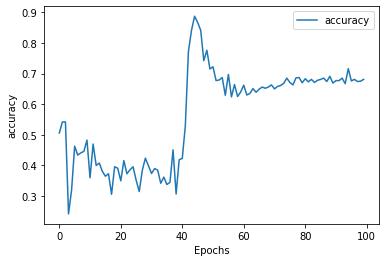

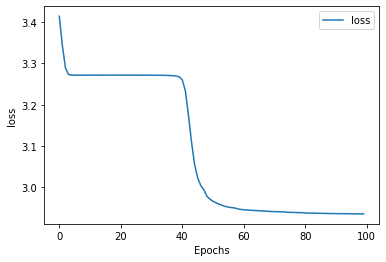

In [ ]:
import matplotlib.pyplot as plt
 
 
def plot_graphs(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
 
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
 
print(decode_sentence(training_padded[0]))
print(training_sentences[0])
print(labels[0])

मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है 🙏 जय श्री राम 🙏 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

In [ ]:
from sklearn.metrics import f1_score
x = (history.model.predict(testing_padded) > 0.1).astype("int64")
f1_score(x,testing_labels,average='weighted')
# print(testing_labels)
# print(x)

0.895685911514642

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 100)
